![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# 1 - Probability mass functions

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [272]:
# Python library that represents empirical distributions.

In [273]:
pip install empiricaldist 

Note: you may need to restart the kernel to use updated packages.


In [274]:
from empiricaldist import Pmf
from empiricaldist import Cdf

In [275]:
gss = pd.read_hdf("gss.hdf5","gss")

In [276]:
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


In [277]:
gss.columns

Index(['year', 'age', 'cohort', 'sex', 'race', 'educ', 'realinc', 'gunlaw',
       'grass', 'wtssall'],
      dtype='object')

In [278]:
educ = gss["educ"]
educ

0        18.0
1        12.0
2        12.0
3        14.0
4        12.0
         ... 
62461    13.0
62462    16.0
62463    13.0
62464    12.0
62465    12.0
Name: educ, Length: 62466, dtype: float64

In [279]:
educ.isna().sum()

162

There are some Nan values, lets drop while creating histogram.

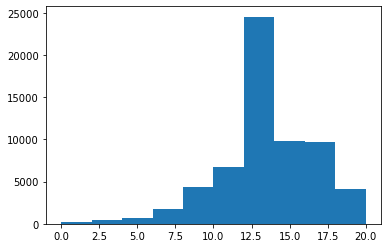

In [280]:
plt.hist(educ.dropna(), label="educ")
plt.show()

# PMF ( Probability Mass Function )

In [281]:
pmf_educ = Pmf.from_seq(educ, normalize=False)

In [282]:
pmf_educ.head()

,probs
0.0,144
1.0,38
2.0,151


In [283]:
pmf_educ[12]

19145

In [284]:
pmf_educ = Pmf.from_seq(educ, normalize=True)

In [285]:
pmf_educ.head()

,probs
0.0,0.002311
1.0,0.000610
2.0,0.002424


In [286]:
pmf_educ[12]

0.3072836414997432

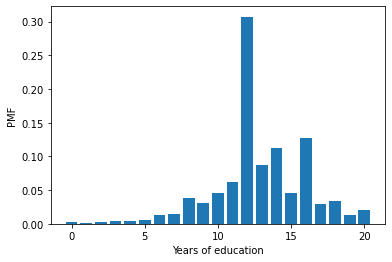

In [287]:
pmf_educ.bar(label="educ")
plt.xlabel("Years of education")
plt.ylabel("PMF")
plt.show()

# PMF shows all unique values compare to Histogram.

### Make a PMF for year with normalize=False and display the result.

In [288]:
pmf_year = Pmf.from_seq(gss["year"], normalize=False)
pmf_year

,probs
1972,1613
1973,1504
1974,1484
1975,1490
1976,1499
1977,1530
1978,1532
1980,1468
1982,1860
1983,1599


## How many respondents were interviewed in 2016?

In [289]:
pmf_year[2016]

2867

In [290]:
age = gss["age"]

In [291]:
pmf_age = Pmf.from_seq(age)

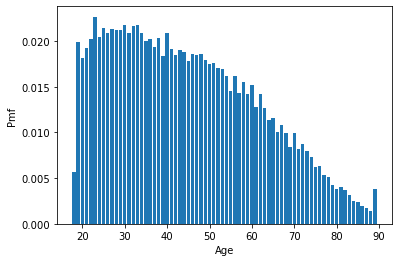

In [292]:
pmf_age.bar()

plt.xlabel("Age")
plt.ylabel("Pmf")
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# 2 - Cumulative Distribution functions

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [293]:
cdf = Cdf.from_seq(gss["age"])

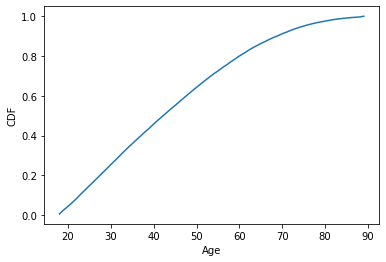

In [294]:
cdf.plot()
plt.xlabel("Age")
plt.ylabel("CDF")
plt.show()

In [295]:
cdf[51]

0.6602013455146835

It means that %66 of population is 51 years old or younger.

In [296]:
p = 0.25
q = cdf.inverse(p)
print(q)

30.0


In [297]:
p = 0.75
q = cdf.inverse(p)
print(q)

57.0


In [298]:
cdf_income = Cdf.from_seq(gss["realinc"])

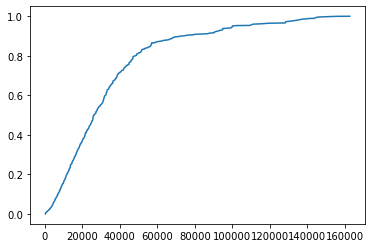

In [299]:
cdf_income.plot();

In [300]:
percentile_75th = cdf_income.inverse(0.75)

In [301]:
percentile_25th = cdf_income.inverse(0.25)

In [302]:
iqr = percentile_75th - percentile_25th

In [303]:
iqr

29676.0

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# 3 - Comparing Distributions

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Multiple PMFs

In [304]:
gss["sex"].value_counts()

2    33820
1    28646
Name: sex, dtype: int64

In [305]:
male = gss["sex"] == 1

In [306]:
male.shape

(62466,)

In [307]:
gss.shape

(62466, 10)

In [308]:
age = gss["age"]

In [309]:
male_age = age[male]
male_age.shape

(28646,)

In [310]:
female_age = age[~male]
female_age.shape

(33820,)

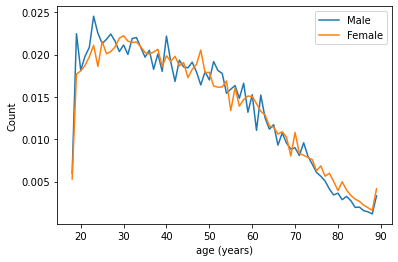

In [311]:
Pmf.from_seq(male_age).plot(label = "Male")
Pmf.from_seq(female_age).plot(label = "Female")
plt.xlabel("age (years)")
plt.ylabel("Count")
plt.legend()
plt.show()

### Multiple CDFs

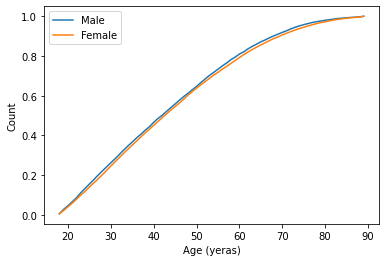

In [312]:
Cdf.from_seq(male_age).plot(label="Male")
Cdf.from_seq(female_age).plot(label="Female")

plt.xlabel("Age (yeras)")
plt.ylabel("Count")
plt.legend()
plt.show()

# CDFs are smoother than PMFs.

In [313]:
income = gss["realinc"]
income.shape

(62466,)

In [314]:
pre95 = gss["year"] < 1995
pre95.shape

(62466,)

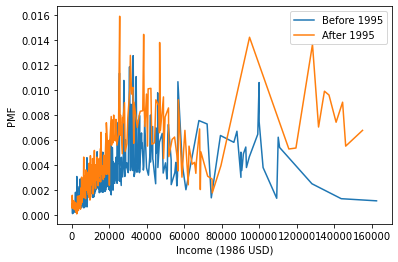

In [315]:
Pmf.from_seq(income[pre95]).plot(label="Before 1995")
Pmf.from_seq(income[~pre95]).plot(label="After 1995")

plt.xlabel("Income (1986 USD)")
plt.ylabel("PMF")
plt.legend()
plt.show()

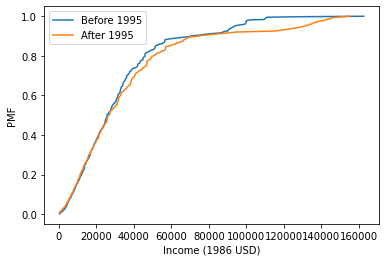

In [316]:
Cdf.from_seq(income[pre95]).plot(label="Before 1995")
Cdf.from_seq(income[~pre95]).plot(label="After 1995")

plt.xlabel("Income (1986 USD)")
plt.ylabel("PMF")
plt.legend()
plt.show()

In [317]:
educ = gss["educ"]
educ.shape

(62466,)

In [318]:
# Bachelor's degree
bach = educ >= 16
bach.shape

(62466,)

In [319]:
# Associate degree
assc = (educ >= 14) & (educ < 16)
assc.shape

(62466,)

In [320]:
# High school (12 or fewer years of education)
high = educ <= 12

In [321]:
income = gss["realinc"]

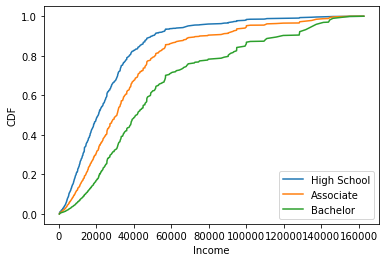

In [322]:
# Plot the CDFs
Cdf.from_seq(income[high]).plot(label = "High School")
Cdf.from_seq(income[assc]).plot(label = "Associate")
Cdf.from_seq(income[bach]).plot(label = "Bachelor")

# Label the axes
plt.xlabel("Income")
plt.ylabel("CDF")
plt.legend()
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# 4 - Modeling Distributions

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Pdf - Probability Density Function

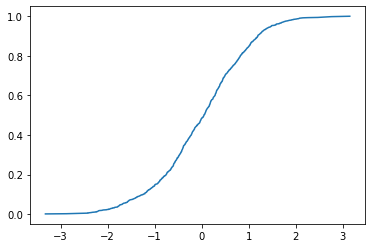

In [323]:
sample = np.random.normal(size = 1000)
Cdf.from_seq(sample).plot();

In [324]:
xs = np.linspace(-3,3)
ys = norm(0,1).cdf(xs) #mean = 0 , standart devbaition = 1

<AxesSubplot:>

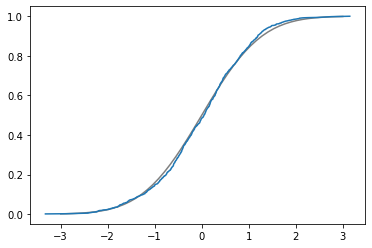

In [325]:
plt.plot(xs,ys,color="gray")
Cdf.from_seq(sample).plot()

In [326]:
xs = np.linspace(-3,3)
ys = norm(0,1).pdf(xs)

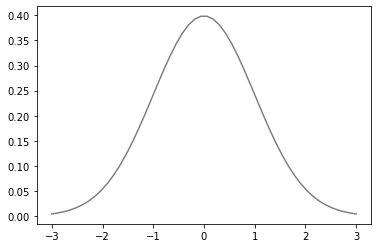

In [327]:
plt.plot(xs,ys,color="gray")

In [328]:
xs = np.linspace(-3,3)
ys = norm(0,1).pdf(xs)

<AxesSubplot:>

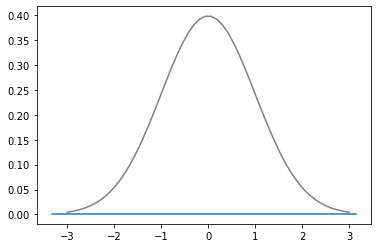

In [329]:
plt.plot(xs,ys,color="gray")
Pmf.from_seq(sample).plot()

# KDE Plot

## Kdeplot _"take the sample"_ and _"estimate the pdf"_ and _"plots it"_.

<AxesSubplot:ylabel='Density'>

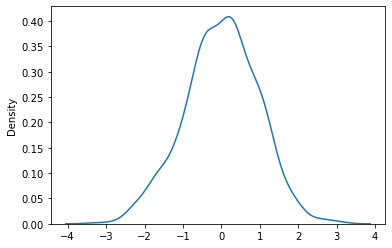

In [330]:
sns.kdeplot(sample)

Compare kdeplot with normal pdf

<AxesSubplot:ylabel='Density'>

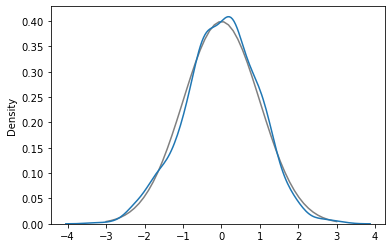

In [331]:
xs = np.linspace(-3,3)
ys = norm.pdf(xs)
plt.plot(xs,ys,color="gray")
sns.kdeplot(sample)

# SUMMARY

# PMF-CDF-KDE

## 1 - Use CDFs for exploration
## 2 - Use PMFs if there are a small number of unique values.
## 3 - Use KDE if there are a lot of values.

In [332]:
print("--"*500)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [333]:
# Extract realinc and compute its log
income = gss["realinc"]

In [335]:
log_income = np.log10(income)

In [336]:
# Compute mean and standard deviation
mean = log_income.mean()
std = log_income.std()

print(mean,std)

4.371148677933652 0.4290082383271419


In [337]:
# Make a norm object
dist = norm(log_income)

In [338]:
# Evaluate the model CDF
xs = np.linspace(2, 5)
ys = dist.pdf(xs)

ValueError: operands could not be broadcast together with shapes (50,) (62466,) 

<AxesSubplot:>

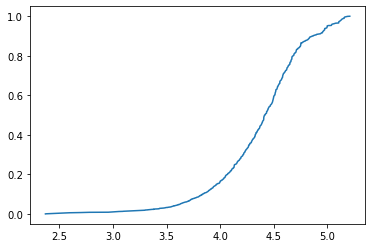

In [339]:
Cdf.from_seq(log_income).plot()

<AxesSubplot:>

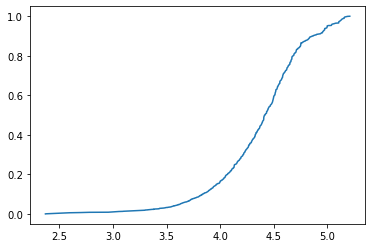

In [340]:
# Create and plot the Cdf of log_income
Cdf.from_seq(log_income).plot()